In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

Data set taken from google advanced data analytics course



Problem Statement we are trying to find if Penguins of same species have different physical characteristics based on sex

In [16]:
df=pd.read_csv('penguins.csv')

In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [18]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
df.describe(include='object')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [20]:
df=df.drop(['island'],axis=1)

we are trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

In [21]:
df.isnull().sum()

species               0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [22]:
df=df.dropna(axis=0)

In [23]:
df.duplicated().sum()

0

In [26]:
df=pd.get_dummies(df,drop_first=True)#hot encoding

In [27]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,sex_male
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0
2,40.3,18.0,195.0,3250.0,0,0,0
4,36.7,19.3,193.0,3450.0,0,0,0
5,39.3,20.6,190.0,3650.0,0,0,1


In [29]:
df=StandardScaler().fit(df).transform(df)

In [31]:
n_clusters=[i for i in range(2,11)]

In [34]:
inertia=[]
silhoutte=[]
def clustering_evaluate(n_clusters):
    for i in n_clusters:
        k_means=KMeans(n_clusters=i,random_state=45)
        k_means.fit(df)
        inertia.append(k_means.inertia_)
        silhoutte.append(silhouette_score(df,k_means.labels_))

In [35]:
clustering_evaluate(n_clusters)

Text(0, 0.5, 'inertia_score')

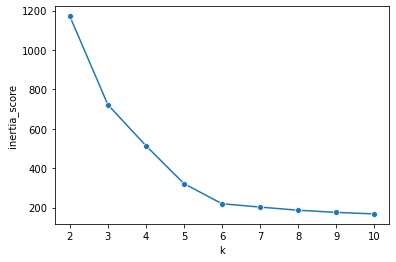

In [41]:
sns.lineplot(x=n_clusters,y=inertia,marker='o')
plt.xlabel('k')
plt.ylabel('inertia_score')

inertia should be as close to zero to say the k value will be suitable for cluster modeling we find k value at elbow
inertia finds intracluster(within cluster distance of each point from mean of observations)

Text(0, 0.5, 'silhoutte_score')

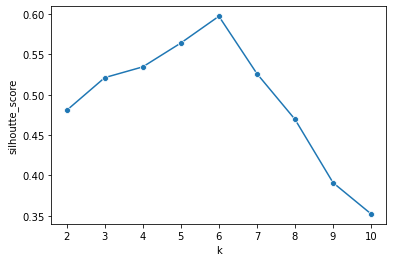

In [42]:
sns.lineplot(x=n_clusters,y=silhoutte,marker='o')
plt.xlabel('k')
plt.ylabel('silhoutte_score')

silhoutte is 1 the point or obsevation is in its cluster
when it is 0 the observation is betwwen two clusters at their boundary
when it is -1 observation is near another cluster
We need to select the k value having the silhoutte score of 1 

We get k=6 as optimized value for k to be used in K-Means cluster modeling using two evaluation scores

steps in k means

Randomly place centroids in the data space.

Assign each point to its nearest centroid.

Update the location of each centroid to the mean position of all the points assigned to it.

Repeat steps 2 and 3 until the model converges (i.e., all centroid locations remain unchanged with successive iterations).

In [43]:
k_means=KMeans(n_clusters=6)

In [44]:
k_means.fit(df)

KMeans(n_clusters=6)

In [46]:
df=pd.read_csv('penguins.csv')

In [47]:
df=df.dropna(axis=0)

In [49]:
df=df.drop(['island'],axis=1)

In [50]:
df['cluster']=k_means.labels_

This task is done using df unscaled dataset because it is often easier to interpret unscaled data.



In [51]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,39.1,18.7,181.0,3750.0,male,5
1,Adelie,39.5,17.4,186.0,3800.0,female,1
2,Adelie,40.3,18.0,195.0,3250.0,female,1
4,Adelie,36.7,19.3,193.0,3450.0,female,1
5,Adelie,39.3,20.6,190.0,3650.0,male,5


<AxesSubplot:title={'center':'Clusters differentiated by species and sex'}, xlabel='(Cluster, Sex)', ylabel='Size'>

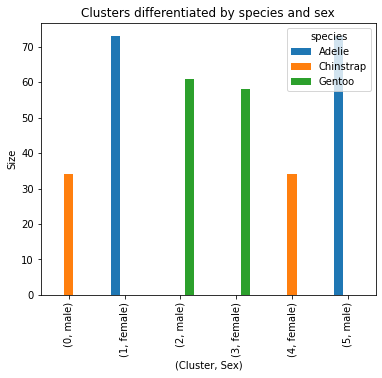

In [58]:
df.groupby(by=['cluster','species','sex']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')

The graph shows that each 'cluster' can be differentiated by 'species' and 'sex'. Furthermore, each cluster is mostly comprised of one sex and one species.

